<a href="https://colab.research.google.com/github/Oebele/Deep-lerning-for-beginners/blob/master/Training_a_Single_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a Single Neuron


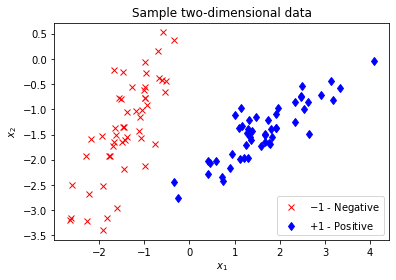

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.5, 
                           random_state=5)

y[y==0] = -1

fig = plt.figure()

plt.plot(X[0,0],X[0,1],'rx',label='$-1$ - Negative')
plt.plot(X[1,0],X[1,1],'bd',label='$+1$ - Positive')

for i in range(len(y)):
  x1 = X[i,0]
  x2 = X[i,1]
  if (y[i] == -1):
    plt.plot(x1,x2,'rx')
  else:
    plt.plot(x1,x2,'bd')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Sample two-dimensional data')
plt.axis('tight')
# plt.savefig('ch.5.two-class.data.png', dpi=350, bbox_inches='tight')
# plt.savefig('ch.5.two-class.data.eps', dpi=350, bbox_inches='tight')
plt.show()

In [ ]:
X[:10]

array([[-0.98221702, -0.78206699],
       [ 1.91747159, -1.36709816],
       [ 1.38378869, -1.42475428],
       [ 1.2469239 , -1.7160026 ],
       [-0.61161925, -0.42609328],
       [-1.08749226, -1.16081696],
       [-1.38183821, -1.05448172],
       [-2.60674166, -2.49108522],
       [-1.066895  , -1.56057167],
       [ 2.62945908, -0.84878879]])

In [ ]:
import numpy as np
N = 100
X = np.append(np.ones((N,1)), X, 1)   
X[:10]

array([[ 1.        , -0.98221702, -0.78206699],
       [ 1.        ,  1.91747159, -1.36709816],
       [ 1.        ,  1.38378869, -1.42475428],
       [ 1.        ,  1.2469239 , -1.7160026 ],
       [ 1.        , -0.61161925, -0.42609328],
       [ 1.        , -1.08749226, -1.16081696],
       [ 1.        , -1.38183821, -1.05448172],
       [ 1.        , -2.60674166, -2.49108522],
       [ 1.        , -1.066895  , -1.56057167],
       [ 1.        ,  2.62945908, -0.84878879]])

## The perceptron learning algorithm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


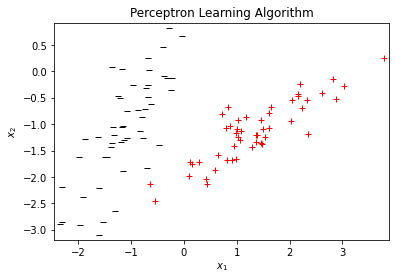

100
36
1
44
5
12
2
13
4
8
2
10
2
3
0


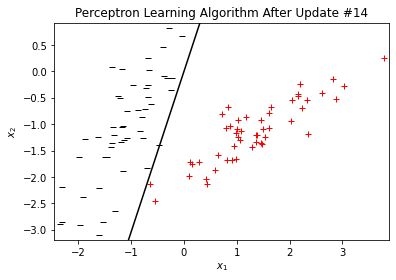

Total iterations:  14


In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def pltPer(X, y, W, it=-1):
  title = "Perceptron Learning Algorithm"
  if it > 0:
    title = title + " After Update #" + str(it)
    
  f = plt.figure()
  for n in range(len(y)):
    if y[n] == 1:
      plt.plot(X[n,1],X[n,2],'r+')
    else:
      plt.plot(X[n,1],X[n,2],'k_')
  m, b = -W[1]/W[2], -W[0]/W[2]
  l = np.linspace(min(X[:,1]),max(X[:,1]))
  plt.plot(l, m*l+b, 'k-')
  plt.axis('tight')
  plt.xlim(min(X[:,1])-0.1, max(X[:,1])+0.1)
  plt.ylim(min(X[:,2])-0.1, max(X[:,2])+0.1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.title(title)
  plt.savefig('ch.5.PLA.'+str(it)+'.png', dpi=350, bbox_inches='tight')
  plt.savefig('ch.5.PLA.'+str(it)+'.eps', dpi=350, bbox_inches='tight')
  plt.show()


def classification_error(w, X, y):
#   s = np.sign(X.dot(w))
#   return sum(s != y)
    
  err_cnt = 0
  N = len(X)
  for n in range(N):
    s = np.sign(w.T.dot(X[n])) # if this is zero, then :(
    if y[n] != s:
      err_cnt += 1
  print(err_cnt)
  return err_cnt

def choose_miscl_point(w, X, y):
#   for idx in np.random.permutation(len(X)):
#     if np.sign(w.T.dot(X[idx])) != y[idx]:
#       return X[idx], y[idx]
  mispts = []
  # Choose a random point among the misclassified
  for n in range(len(X)):
    if np.sign(w.T @ X[n]) != y[n]:
      mispts.append((X[n], y[n]))
  #print(len(mispts))
  return mispts[random.randrange(0,len(mispts))]

# main
N = 100
random.seed(a = 7)
np.random.seed(7)

X, y = make_classification(n_samples=N, n_features=2, n_classes=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_clusters_per_class=1, class_sep=1.2, 
                           random_state=5)

y[y==0] = -1

X_train = np.append(np.ones((N,1)), X, 1)   # add a column of ones

# initialize the weights to zeros
w = np.zeros(X_train.shape[1])
it = 0
pltPer(X_train,y,w)  # initial solution (likely bad)

# Iterate until all points are correctly classified
while classification_error(w, X_train, y) != 0:
  it += 1
  # Pick random misclassified point
  x, s = choose_miscl_point(w, X_train, y)
  # Update weights
  w += s*x
  if it > 1000:
    break
pltPer(X_train,y,w, it)

print("Total iterations: ", it)